<a href="https://colab.research.google.com/github/DavidMartinez16/Skin-Cancer-CNN/blob/master/CNN_Skin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**


In [ ]:
import sys
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, Activation
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Save the path of the images**

In [ ]:
K.clear_session()

data_train = '/content/drive/My Drive/Skin Cancer/data/train'
data_validation = '/content/drive/My Drive/Skin Cancer/data/test'

**Define some variables**

In [ ]:
epocas = 60
altura, longitud = 100, 100 # Tamaño a procesar las imágenes
batch_size = 32 # Número de imágenes a mandar en cada época
pasos_epoca = 127
pasos_validacion = 25
# Tamaños de los filtros
filtrosConv1 = 32
filtrosConv2 = 64
tamano_filtro1 = (3,3)
tamano_filtro2 = (2,2)
tamano_pool = (2,2)
clases = 2
lr = 0.0005 

Generate sevaral images with different features

In [ ]:
entrenamiento_datagen = ImageDataGenerator(
    rescale=1./255, # Reescalar valores de pixeles de 0 a 1
    shear_range = 0.3, # Inclina las imágenes
    zoom_range = 0.3, # Añade zoom a las imágenes
    horizontal_flip = True # Invierte las imágenes, direccionalidad
)

validacion_datagen = ImageDataGenerator(
    rescale=1./255,
)

**Access to the path and transform each image in the folder**

In [ ]:
# Entra al directorio de training
imagen_train = entrenamiento_datagen.flow_from_directory(
    data_train,
    target_size= (altura, longitud),
    batch_size = batch_size,
    class_mode = 'categorical'
)
# Entra al directorio de validacion
imagen_validation = validacion_datagen.flow_from_directory(
    data_validation,
    target_size= (altura, longitud),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 4084 images belonging to 2 classes.
Found 724 images belonging to 2 classes.


**Create the Convolutional Neural Network**

In [ ]:
# Red Neuronal Convolucional
cnn = Sequential()
cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding='same', input_shape=(altura, longitud,3), activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))
cnn.add(Convolution2D(filtrosConv2, tamano_filtro2, padding='same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding='same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))
cnn.add(Convolution2D(filtrosConv1, tamano_filtro1, padding='same', activation = 'relu'))
cnn.add(MaxPooling2D(pool_size=tamano_pool))
cnn.add(Flatten()) # Añade 1 dimensión que contiene toda la informacion de la CNN
cnn.add(Dense(256, activation = 'relu')) # Capa normal de la RNN
cnn.add(Dropout(0.5)) # Apaga el 50 % de las neuronas, evita sobreajuste
cnn.add(Dense(clases, activation = 'softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=lr), metrics =['accuracy'])

**Architechture of the Neural Network**

In [ ]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 100, 100, 64)      832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        16448     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 25, 32)        18464     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 32)       

**Fit**

In [ ]:
history=cnn.fit(imagen_train, steps_per_epoch=pasos_epoca, epochs=epocas, validation_data = imagen_validation, 
                 validation_steps = (724/batch_size))

Epoch 1/60
127/127 [==============================] - 1174s 9s/step - loss: 0.6157 - accuracy: 0.6614 - val_loss: 0.5237 - val_accuracy: 0.7210
Epoch 2/60
127/127 [==============================] - 47s 371ms/step - loss: 0.5286 - accuracy: 0.7394 - val_loss: 0.4948 - val_accuracy: 0.7238
Epoch 3/60
127/127 [==============================] - 47s 366ms/step - loss: 0.5053 - accuracy: 0.7406 - val_loss: 0.4693 - val_accuracy: 0.7320
Epoch 4/60
127/127 [==============================] - 47s 372ms/step - loss: 0.4732 - accuracy: 0.7591 - val_loss: 0.4770 - val_accuracy: 0.7293
Epoch 5/60
127/127 [==============================] - 47s 368ms/step - loss: 0.4584 - accuracy: 0.7641 - val_loss: 0.4822 - val_accuracy: 0.7210
Epoch 6/60
127/127 [==============================] - 47s 370ms/step - loss: 0.4514 - accuracy: 0.7754 - val_loss: 0.4810 - val_accuracy: 0.7320
Epoch 7/60
127/127 [==============================] - 47s 367ms/step - loss: 0.4462 - accuracy: 0.7732 - val_loss: 0.4239 - val_acc

**The same proccess but with the testing Images**

Save the model and the weights of the trained model

In [ ]:
cnn.save('/content/drive/My Drive/modelo2/model3.h5')
cnn.save_weights('/content/drive/My Drive/modelo2/pesos3.h5')

In [ ]:
data_test = '/content/drive/My Drive/Skin Cancer/data/real_test'

In [ ]:
# Transformo las imágenes de prueba
testing_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3, # Inclina las imágenes
    zoom_range = 0.3, # Añade zoom a las imágenes
    horizontal_flip = True # Invierte las imágenes, direccionalidad
)

imagen_test = testing_datagen.flow_from_directory(
    data_test,
    target_size=(altura, longitud),
    batch_size = batch_size,
    class_mode = 'categorical'
)

test_labels = imagen_test.classes

Found 146 images belonging to 2 classes.


**Define function which will be use later**

In [ ]:
def plot_training_curves(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(acc) + 1)
    
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.figure()
    
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    
    plt.show()

**Plot the training curves**

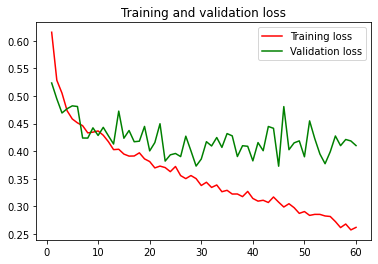

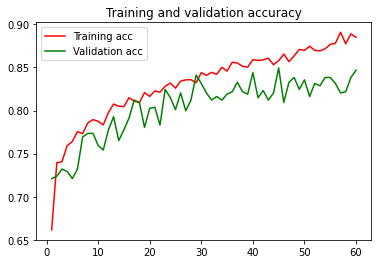

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_training_curves(history)